In [2]:
!pip install gym
import gym

     |████████████████████████████████| 721 kB 4.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827621 sha256=29b3d4ce7c35bace5ccc98bb686a418e50d0d4437c928da0839a48d1f5f31a52
  Stored in directory: /Users/mengfanxu/Library/Caches/pip/wheels/af/2b/30/5e78b8b9599f2a2286a582b8da80594f654bf0e18d825a4405
Successfully built gym


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn, optim

In [36]:
# Note: The syntax used here is for the latest gym version (0.26.0)
#       If you are using gym versions older than 0.25.0, then the syntax is different:
#       e.g. observation = env.reset()
#            observation, reward, done, info = env.step(action)
#       ref: https://www.gymlibrary.dev/api/core/#gym.Env.step

# Question 1: Cartpole-v0
env = gym.make("CartPole-v0")


class Agent:
    def __init__(self, n_states, n_hidden, n_actions, lr):
        
        self.net = nn.Sequential(nn.Linear(n_states, n_hidden),
                                 nn.ReLU(),
                                 nn.Linear(n_hidden, n_actions),
                                 nn.Softmax(dim=0))
        
        self.opt = optim.Adam(self.net.parameters(), lr=lr)
        
    def predict(self, observation):
        state = torch.tensor(observation, dtype=torch.float32)
        actions = agent.net(state)
        
        return actions

    def update(self, loss):
        self.opt.zero_grad()
        loss.backward()
        self.opt.step()


In [37]:
def discount_rewards(rewards, gamma=0.95):
    discounted = []
    R = 0
    for r in rewards[::-1]:
        R = r + gamma * R
        discounted.insert(0, R)
        
    discounted = np.array(discounted)
    normed = (discounted - discounted.mean())/discounted.std()
    
    return normed

In [38]:
agent = Agent(4, 128, 2, lr=0.001)
print_every = 10
update_every = 1
replay = {'actions':[], 'rewards':[]}
render = True
reward_log = []

In [39]:

# Roll out 10 episdoes
for episode in range(10):
    print(f"Cartpole-v0, episode {episode}")
    # Initiate one episode
    observation, info = env.reset()

    obs_history = []
    reward_history = []
    action_history = []

    terminated = False
    truncated = False

    # Roll out one episode
    while (not terminated) and (not truncated):
        action_ps = agent.predict(observation)
        action = torch.multinomial(action_ps, 1).item()
        action_history.append(action_ps[action].unsqueeze(0))
                
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        env.render()

        obs_history.append(observation)
        reward_history.append(reward)

        observation = next_observation
        
        
    reward_log.append(sum(reward_history))
    losses = []
    rewards = discount_rewards(reward_history)

    replay['actions'].extend(action_history)
    replay['rewards'].extend(rewards)

    for a, r in zip(*replay.values()):
        losses.append(-torch.log(a)*r)
    loss = torch.cat(losses).sum()
    agent.update(loss)

    replay['actions'], replay['rewards'] = [], []

    # TODO: Update your policy using the collected episodes

env.close()



Cartpole-v0, episode 0
Cartpole-v0, episode 1
Cartpole-v0, episode 2
Cartpole-v0, episode 3
Cartpole-v0, episode 4
Cartpole-v0, episode 5
Cartpole-v0, episode 6
Cartpole-v0, episode 7
Cartpole-v0, episode 8
Cartpole-v0, episode 9


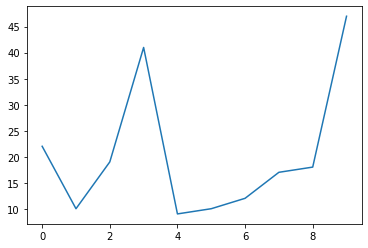

In [40]:
plt.plot(reward_log)
